In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# Reading the exercise dataset containing different features 
df = pd.read_csv("D:\mobile_phone_pricing\Mobile Phone Pricing\dataset.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [31]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [32]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [33]:
df.shape

(2000, 21)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [35]:
#Checking there is missing value present or not
df.isnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [37]:

from sklearn.preprocessing import LabelEncoder

# Identify all object (string-based) columns
cat_cols = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# View the transformed dataset
print("Transformed dataset (first 10 rows):")
print(df.head())

Transformed dataset (first 10 rows):
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

 

In [38]:

# Define feature matrix X (all columns except 'price_range')
X = df.drop('price_range', axis=1)

# Define target vector y (only the 'price_range' column)
y = df['price_range']

# Show shapes to confirm
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (2000, 20)
Shape of y (target): (2000,)


In [39]:

from sklearn.model_selection import train_test_split

# Split into training and test sets (target: 'price_range')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (1600, 20)
X_test shape : (400, 20)
y_train shape: (1600,)
y_test shape : (400,)


In [40]:

# Check for null (missing) values in the dataset
missing_values = df.isnull().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [41]:
# Fill NaNs in numeric columns of X_train and X_test using the median from X_train
for col in X_train.select_dtypes(include='number').columns:
    if X_train[col].isna().sum() > 0:
        median_value = X_train[col].median()
        X_train[col] = X_train[col].fillna(median_value)
        X_test[col] = X_test[col].fillna(median_value)


In [42]:
print("Missing values in y_train (price_range):", y_train.isna().sum())
print("Missing values in y_test  (price_range):", y_test.isna().sum())

Missing values in y_train (price_range): 0
Missing values in y_test  (price_range): 0


In [43]:
# Combine X_train and y_train to drop rows with missing target values
train_data = pd.concat([X_train, y_train], axis=1)

# Drop rows where 'price_range' is missing
train_data.dropna(subset=['price_range'], inplace=True)

# Re-split after dropping
X_train = train_data.drop('price_range', axis=1)
y_train = train_data['price_range']


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Initialize and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lr = lin_reg.predict(X_test)

# Evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Output results
print(" Linear Regression Evaluation (on price_range):")
print(f"   MSE  : {mse_lr:.2f}")
print(f"   RMSE : {rmse_lr:.2f}")
print(f"   R²   : {r2_lr:.4f}")


 Linear Regression Evaluation (on price_range):
   MSE  : 0.10
   RMSE : 0.32
   R²   : 0.9215


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_reg.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(" Random Forest Regressor Evaluation (on price_range):")
print(f"   MSE  : {mse_rf:.2f}")
print(f"   RMSE : {rmse_rf:.2f}")
print(f"   R²   : {r2_rf:.4f}")


 Random Forest Regressor Evaluation (on price_range):
   MSE  : 0.07
   RMSE : 0.27
   R²   : 0.9463


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_rf)
print(" Random Forest Classifier Evaluation:")
print(f"   Accuracy Score     : {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


 Random Forest Classifier Evaluation:
   Accuracy Score     : 0.8925

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [50]:
print("\n=== Model Comparison (Regression Metrics) ===")
print(f"Linear Regression  -> RMSE: {rmse_lr:,.2f} | R²: {r2_lr:.4f}")
print(f"Random Forest      -> RMSE: {rmse_rf:,.2f} | R²: {r2_rf:.4f}")


=== Model Comparison (Regression Metrics) ===
Linear Regression  -> RMSE: 0.32 | R²: 0.9215
Random Forest      -> RMSE: 0.27 | R²: 0.9463


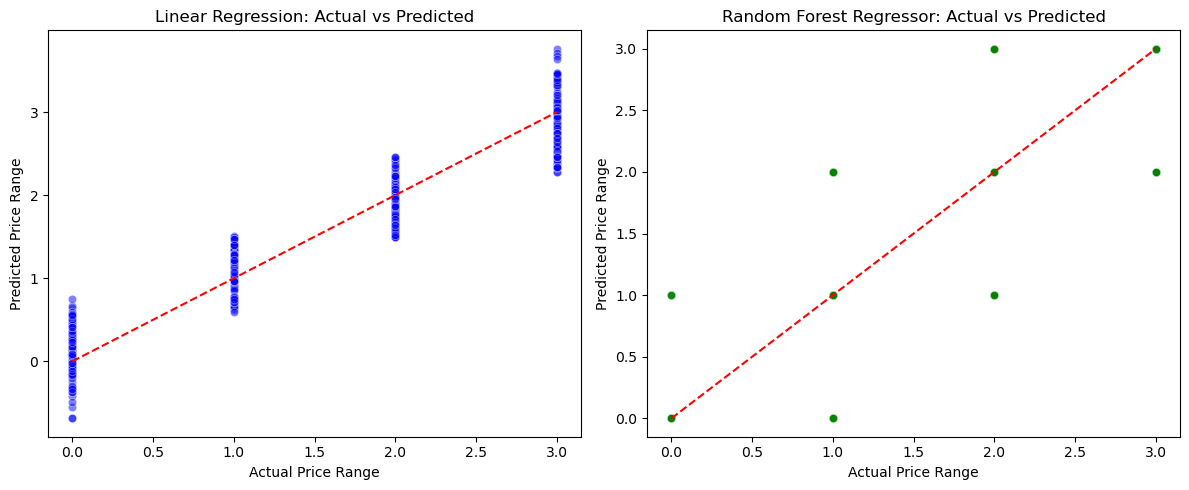

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Actual vs Predicted for Linear Regression and Random Forest Regressor
plt.figure(figsize=(12, 5))

# --- Linear Regression Plot ---
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price Range")
plt.ylabel("Predicted Price Range")
plt.title("Linear Regression: Actual vs Predicted")

# --- Random Forest Regressor Plot ---
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price Range")
plt.ylabel("Predicted Price Range")
plt.title("Random Forest Regressor: Actual vs Predicted")

plt.tight_layout()
plt.show()


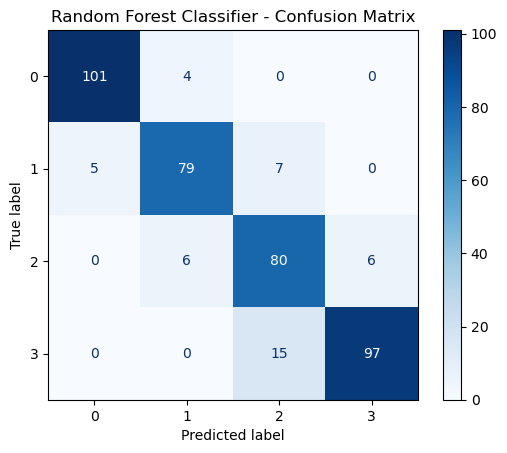

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Random Forest Classifier - Confusion Matrix")
plt.show()


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Load your dataset
df = pd.read_csv("D:\mobile_phone_pricing\Mobile Phone Pricing\dataset.csv")  

# 2. Drop rows with missing target (if any)
df.dropna(subset=['price_range'], inplace=True)

# 3. Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 4. Define features and target
# Automatically use all columns except 'price' as features
feature_cols = df.columns.drop('price_range')
target_col = 'price_range'

# 5. Build X and y
X = df[feature_cols]
y = df[target_col]

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train the model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 8. Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation:")
print(f"   RMSE: {rmse:.2f}")
print(f"   R²  : {r2:.4f}")

# 9. Predict on new sample (example values must match feature count and order)
# You should replace this with real values based on your actual column meanings
new_sample = [X.columns.get_loc(col) for col in X.columns]  # dummy placeholder
new_phone = [0] * len(feature_cols)  # dummy input – update based on actual feature structure

predicted_price = model.predict([new_phone])[0]
print(df[feature_cols].head())
print(f"\n Predicted mobile price: ${predicted_price:,.2f}")


 Model Evaluation:
   RMSE: 0.26
   R²  : 0.9477
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15

C:\Users\SIPRA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
